# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

## background

At this project we try to scrap historical exchange rates between IDR and USD for period between 1/12/2022 and 7/11/2022 from https://www.exchange-rates.org/ website. exchange-rates.org is a website which provide world currency exchange rates and currency exchange rate history.

In this case, Let's say we have task to make a forecast on USD exchange rate to IDR. To do that we need to have the data, and scrapping is a good way to collect the data we don't have from public. 

We will scrap 2 points from this sites. One is daily exchange rate, or the exchange rate from 1 USD to IDR in a certain date. The other one is the date. 

## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [1]:
import requests

url_get = requests.get('https://www.exchange-rates.org/history/IDR/USD/T')

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [2]:
url_get.content[1:500]

b'!DOCTYPE html>\r\n<!--[if lt IE 9]>\r\n<html class="no-js ie8 oldie" lang="en" xml:lang=\'en\'>\r\n<![endif]-->\r\n<!--[if gt IE 8]><!--><html class="no-js" lang="en" xml:lang=\'en\'><!--<![endif]-->\r\n<head>\r\n<title>Indonesian Rupiah Exchange Rate - US Dollar - Historical Exchange Rates</title>\r\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\r\n<meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=5">\r\n<meta charset="utf-8" /><meta http-equiv="Content-Type" content="text/ht'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [3]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")

In [4]:
print(soup.prettify()[:500])

<!DOCTYPE html>
<!--[if lt IE 9]>
<html class="no-js ie8 oldie" lang="en" xml:lang='en'>
<![endif]-->
<!--[if gt IE 8]><!-->
<html class="no-js" lang="en" xml:lang="en">
 <!--<![endif]-->
 <head>
  <title>
   Indonesian Rupiah Exchange Rate - US Dollar - Historical Exchange Rates
  </title>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1, maximum-scale=5" name="viewport"/>
  <meta charset="utf-8">
   <meta content="text/html; charse


## Finding the right key to scrap the data & Extracting the right information

- based on the html the key for the table using div with class table-responsive
- here I use find to define the table with 'div class = table-responsive'

In [5]:
table = soup.find('div', attrs={'class':'table-responsive'})
print(table.prettify()[1:500])

div class="table-responsive">
 <table class="table table-striped table-hover table-hover-solid-row table-simple history-data">
  <tbody>
   <tr>
    <td>
     7/11/2022
    </td>
    <td>
     Monday
    </td>
    <td>
     <a href="/Rate/USD/IDR/7-11-2022">
      15,010.52059
     </a>
     IDR
    </td>
    <td class="text-narrow-screen-hidden">
     <a href="/Rate/USD/IDR/7-11-2022">
      USD IDR rate for 7/11/2022
     </a>
    </td>
   </tr>
   <tr>
    <td>
     7/8/2022
    </td>
    <t


Based on the result above, we can see that every row is shown with tr,
that's why to fine the row lenght we just need to find all tr

In [107]:
# Finding row length.
row = table.find_all('tr')
row_length = len(row)
row_length

129

Then, let's o the scrapping process here:
- get a column for date (tanggal)
- get a clumn for daily rate (kurs_harian)
- hasil list akan terbalik (dari tanggal terbaru ke tanggal paling lama) sehingga perlu dibalik menggunakan ::1

In [147]:
kurs = [] #initiating a tuple

for i in range(row_length):
    #to get date column
    tanggal = table.find_all('tr')[i].find_all('td')[0].text
    
    #to get the exchange rate amount without additional text
    kurs_harian = table.find_all('tr')[i].find_all('td')[2].text[:-4]
    
    kurs.append((tanggal, kurs_harian)) 
    #scrapping process
    
kurs = kurs[::-1]
kurs

[('1/12/2022', '14,298.95000'),
 ('1/13/2022', '14,309.00000'),
 ('1/14/2022', '14,314.55000'),
 ('1/17/2022', '14,331.25000'),
 ('1/18/2022', '14,358.70000'),
 ('1/19/2022', '14,362.85000'),
 ('1/20/2022', '14,327.60000'),
 ('1/21/2022', '14,329.75000'),
 ('1/24/2022', '14,350.70000'),
 ('1/25/2022', '14,330.55000'),
 ('1/26/2022', '14,366.45000'),
 ('1/27/2022', '14,395.00000'),
 ('1/28/2022', '14,383.40000'),
 ('1/31/2022', '14,339.40000'),
 ('2/1/2022', '14,328.30000'),
 ('2/2/2022', '14,355.35000'),
 ('2/3/2022', '14,387.00000'),
 ('2/4/2022', '14,400.70000'),
 ('2/7/2022', '14,394.90000'),
 ('2/8/2022', '14,386.75000'),
 ('2/9/2022', '14,334.30000'),
 ('2/10/2022', '14,357.00000'),
 ('2/11/2022', '14,344.75000'),
 ('2/14/2022', '14,303.45000'),
 ('2/15/2022', '14,265.45000'),
 ('2/16/2022', '14,274.45000'),
 ('2/17/2022', '14,357.40000'),
 ('2/18/2022', '14,366.90000'),
 ('2/21/2022', '14,354.80000'),
 ('2/22/2022', '14,380.20000'),
 ('2/23/2022', '14,351.75000'),
 ('2/24/2022', 

## Creating data frame & Data wrangling

Put the array into dataframe

In [112]:
import pandas as pd

df = pd.DataFrame(kurs, columns = ('tanggal', 'kurs_harian'))
df.head()

,tanggal,kurs_harian
0,1/12/2022,"14,298.95000"
1,1/13/2022,"14,309.00000"
2,1/14/2022,"14,314.55000"
3,1/17/2022,"14,331.25000"
4,1/18/2022,"14,358.70000"


Do the data cleaning here:
- change datatype of date column to datetime
- remove comma in string or kurs_harian, then change the data type to float

In [117]:
#change datatype of date column to datetime
df['tanggal'] = df['tanggal'].astype('datetime64') 

#remove comma in string of exchange rate, then change the data type to float
df['kurs_harian'] = df['kurs_harian'].str.replace(",","").astype('float64')

df.head()

,tanggal,kurs_harian
0,2022-01-12,14298.95
1,2022-01-13,14309.00
2,2022-01-14,14314.55
3,2022-01-17,14331.25
4,2022-01-18,14358.70


Let's check if we have used the right data type

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   tanggal      129 non-null    datetime64[ns]
 1   kurs_harian  129 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.1 KB


Data visualisation:
- setting the tanggal column as index so it is easier to make visualization

In [120]:
#set date as index for visualization
df = df.set_index('tanggal')
df

,kurs_harian
tanggal,
2022-01-12,14298.95000
2022-01-13,14309.00000
2022-01-14,14314.55000
2022-01-17,14331.25000
2022-01-18,14358.70000
...,...
2022-07-05,15014.65000
2022-07-06,14996.82520
2022-07-07,14964.65000


visualisasi sederhana pergerakan kurs

<AxesSubplot:xlabel='tanggal'>

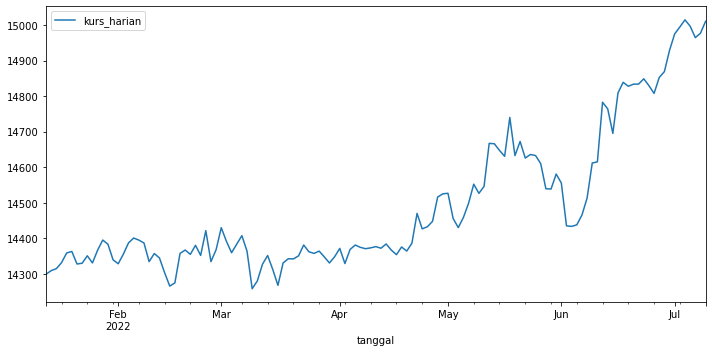

In [145]:
df.plot()

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 

In [129]:
import matplotlib
from matplotlib import pyplot as plt

Text(0, 0.5, 'Exchange Rate')

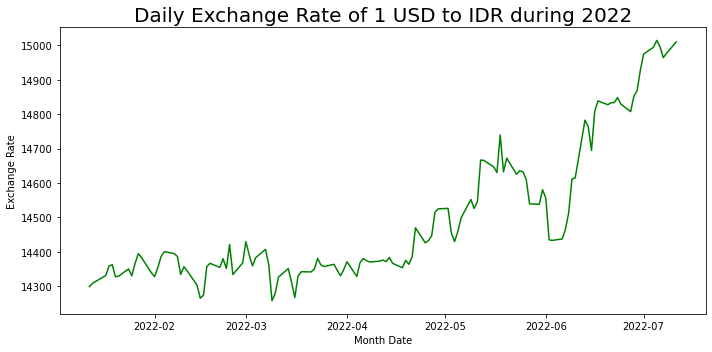

In [146]:
plt.rcParams["figure.figsize"] = [10, 5]
plt.rcParams["figure.autolayout"] = True

plt.plot(df, color='green')

plt.title('Daily Exchange Rate of 1 USD to IDR during 2022', fontsize=20)
plt.xlabel('Month Date')
plt.ylabel('Exchange Rate')

Berdasarkan plot diatas, dapat kita lihat bahwa:
- tren pergerakan exchange rate 1 USD ke IDR sejak januari 2022 ke juli 2022 cenderung naik.
- namun terjadi penurunan yang signifikan di bulan Juni
- exchange rate tertinggi ada di bulan Juli 2022
- Dapat dikatakan bahwa rupiah melemah terhadap dolar

### Extra Challange

This will be not included to the scoring. 

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.